# TP4_ECN7055A: Les fonctions et les classes

Les codes si dessous sont tous tirés de quantecon, avec de légères modifications quand nécessaire!

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
import quantecon as qe
%pwd

'/Users/fansa/PHD2_codes'

In [76]:
#!conda install -y quantecon

Suppose a consumer who spends and earn money, starting on a initial level of wealth.

In [77]:
#Two functions to do that
def earn(w,y):
    "Consumer with inital wealth w earns y"
    return w+y

def spend(w,x):
    "consumer with initial wealth w spends x"
    new_wealth = w -x
    if new_wealth < 0:
        print("Insufficient funds")
    else:
        return new_wealth

In [78]:
w0=100
w1=earn(w0,10)
w1


110

In [79]:
#La fameuse fonction lambda, une façon rapide de définir de petites fonction
g = lambda x: 2*x+1
g(0)

1

Classes are blueprints that help you build objects according to your own specifications.\
It takes a little while to get used to the syntax, so read as much as you can about them. \

We’ll build a Consumer class with

a wealth attribute that stores the consumer’s wealth (data)

an earn method, where earn(y) increments the consumer’s wealth by y

a spend method, where spend(x) either decreases wealth by x or returns an error if insufficient funds exist



In [80]:
class Consumer:

    def __init__(self,w):                 #toujours metter self comme premier argument des fonctions dans une classe
        "Initialize consumer with w dollars of wealth"
        self.wealth = w                    #toujours redefinir les variables             

    def earn(self,y):
        "The consumer earns y dollars"
        self.wealth += y

    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth
            

In [81]:
w=11
c1 = Consumer(w)  # Create instance with initial wealth 11
c1.spend(5)
c1.wealth

6

In [82]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

L'un des avantages des classes est que vous pouvez écrire un code complexe en le décomposant en fonctions. Vous pourriez ensuite mettre ses fonctions ensemble dans une classe, et appeler les variables d'une fonction à l'autres. Cela vous permet d'éviter les erreurs qui peuvent décourager dans le chemin de la recherche. 

Example: Neoclassical growth model (https://python-programming.quantecon.org/python_oop.html#top) 

In [83]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n) 

    """
    
    #docstrings
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

In [84]:
Solow?

In [85]:
s1=Solow(k=2)


In [86]:
s1.generate_sequence(10)

[2,
 2.3005449587356743,
 2.5833019976646914,
 2.8473019256192518,
 3.092339113258984,
 3.318715408359758,
 3.5270645753486174,
 3.7182300924599634,
 3.8931793583618757,
 4.052943297949228]

In [87]:
s1.steady_state()

5.5843115041821845

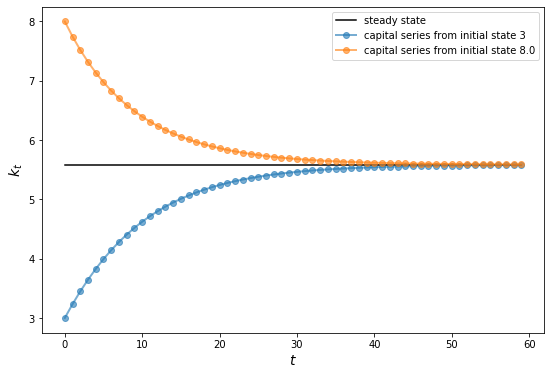

TOC: Elapsed: 0:01:43.23


In [88]:
s1 = Solow(k=3)
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

time0 = qe.toc()

Faire l'example Chaos (sans regarder la solution), vous verrai exactement la même technique et cela vous permettra de la retenir face aux problèmes similaires.

Accélérateur de code: Numba

just in time (JIT) compilation.

The key idea is to compile functions to native machine code instructions.

When it succeeds, the compiled code is extremely fast.

Numba is specifically designed for numerical work.

Type inference is a key part of JIT compilation.


In [89]:
import quantecon as qe
from numba import jit
qe.tic()

Let’s consider a problem that is generating the trajectory of a difference equation given an initial condition.

We will take the difference equation to be the quadratic map: $x_{t+1}= \alpha x_t (1-x_t)$, $x_0=0.1$



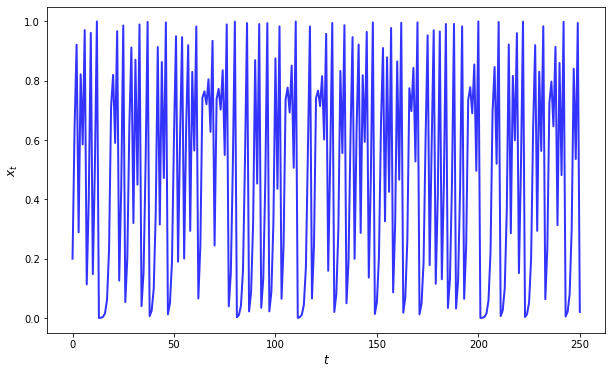

In [90]:
#@jit #expression à mettre avant la definition des fonctions
α = 4.0

def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
      x[t+1] = α * x[t] * (1 - x[t])
    return x

x = qm(0.2, 250)
fig, ax = plt.subplots()
ax.plot(x, 'b-', lw=2, alpha=0.8)
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$x_{t}$', fontsize = 12)
plt.show()

In [91]:
n = 10_000_000

qe.tic()
qm(0.1, int(n))
time1 = qe.toc()

TOC: Elapsed: 0:00:7.89


In [92]:
qm_numba = jit(qm)

In [93]:
qe.tic()
qm_numba(0.1, int(n))
time2 = qe.toc()

TOC: Elapsed: 0:00:0.12


In [94]:
gain= time1/time2
gain

62.06223566426621

When Numba cannot infer all type information, some Python objects are given generic object status and execution falls back to the Python runtime. No gain in time.

We generally prefer to force an error when this occurs, so we know effective compilation is failing.

This is done by using either $@jit(nopython=True)$ or, equivalently, $@njit$ instead of $@jit$.

In [95]:
from numba import float64
from numba import jitclass
# float64
#We are importing it here because Numba needs a bit of extra help with types when it trys to deal with classes.


In [166]:
solow_data = [
    ('n', float64),
    ('s', float64),
    ('δ', float64),
    ('α', float64),
    ('z', float64),
    ('k', float64)
]
@jitclass(solow_data) #seule nouvelle différence
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

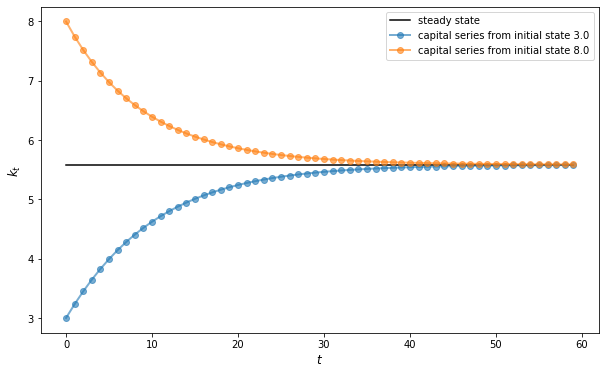

TOC: Elapsed: 0:00:0.00


In [167]:
s1 = Solow(k=3)
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots()

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)
ax.set_ylabel('$k_{t}$', fontsize=12)
ax.set_xlabel('$t$', fontsize=12)
ax.legend()
plt.show()
qe.tic()
time3 = qe.toc()

In [168]:
timeg=time0/time3
timeg

3878812669.1104975